# Escola de Dados - Python para inovação cívica

Os dados que usaremos nesse notebook pode ser encontrado em: [Candidatos - 2016](https://dadosabertos.tse.jus.br/dataset/candidatos-2016) e [Candidatos - 2020](https://dadosabertos.tse.jus.br/dataset/candidatos-2020-subtemas) disponível no Portal de Dados Abertos do Tribunal Superior Eleitoral.


Os dados também podem ser encontrados na pasta "base_dados" deste repositório.


------
Pontos para aula:

- Quantas candidaturas para a Câmara de Vereadores houveram em cada ano agrupado por gênero ? 
- Qual a faixa etária média das pessoas candidatas para a Câmara de Vereadores?
- Há correlação entre idade, gênero e custo da campanha?
- Visualização gráfica da distribuição da variável DS_COR_RACA em 2020

In [7]:
# Importação das bibliotecas necessárias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
# Carga das bases de dados necessárias

df_candidatos_2016_ap = pd.read_csv('base_dados/consulta_cand_2016_AP.csv', sep=';', encoding='latin_1')
df_candidatos_2020_ap = pd.read_csv('base_dados/consulta_cand_2020_AP.csv', sep=';', encoding='latin_1')
df_candidatos_2016_pa = pd.read_csv('base_dados/consulta_cand_2016_PA.csv', sep=';', encoding='latin_1')
df_candidatos_2020_pa = pd.read_csv('base_dados/consulta_cand_2020_PA.csv', sep=';', encoding='latin_1')


# Quantas candidaturas houveram em cada ano agrupado por gênero ? 

In [62]:
# 2016 - Amapá
df_candidatos_2016_ap["DS_GENERO"].value_counts()
# 2020 - Amapá
df_candidatos_2020_ap["DS_GENERO"].value_counts()

# 2016 - Pará
df_candidatos_2016_pa["DS_GENERO"].value_counts()
# 2020 - Pará
df_candidatos_2020_pa["DS_GENERO"].value_counts()

# 2016 - Pará e Amapá
df_completo_2016 = pd.concat([df_candidatos_2016_ap, df_candidatos_2016_pa], axis=0, ignore_index=True)
df_completo_2016["DS_GENERO"].value_counts()

# 2020 - Pará e Amapá
# 2020 - Pará e Amapá
df_completo_2020 = pd.concat([df_candidatos_2020_ap, df_candidatos_2020_pa], axis=0, ignore_index=True)
df_completo_2020["DS_GENERO"].value_counts()

# 2016 e 2020 - Pará e Amapá
df_completo_2016_2020 = pd.concat([df_candidatos_2016_ap, df_candidatos_2016_pa, df_candidatos_2020_ap, df_candidatos_2020_pa], axis=0, ignore_index=True)
# Solução 1
df_completo_2016_2020[["ANO_ELEICAO", "DS_GENERO"]].groupby(["ANO_ELEICAO", "DS_GENERO"]).value_counts()
# Solução 2
df_completo_2016_2020[["ANO_ELEICAO", "DS_GENERO", "CD_CARGO"]].groupby(["ANO_ELEICAO", "DS_GENERO"]).count()

CD_CARGO
ANO_ELEICAO DS_GENERO               
2016        FEMININO            7243
            MASCULINO          15281
            NÃO DIVULGÁVEL         5
2020        FEMININO            8916
            MASCULINO          17235
            NÃO DIVULGÁVEL         2

# Qual a faixa etária média das pessoas candidatas para a Câmara de Vereadores?

In [63]:
# Idade
df_completo_2016_2020["NR_IDADE_DATA_POSSE"].mean()

# Faixa Etária
faixas_etarias = [0, 30, 40, 50, 60, 70, 80, 90, 100]
categorias_etarias = ["0 a 30 anos", "31 a 40 anos", "41 a 50 anos", "51 a 60 anos", "61 a 70 anos", "71 a 80 anos", "81 a 90 anos", "91 a 100 anos"]
df_completo_2016_2020["FAIXA_ETARIA"] = pd.cut(df_completo_2016_2020["NR_IDADE_DATA_POSSE"], bins=faixas_etarias, labels=categorias_etarias)
df_completo_2016_2020["FAIXA_ETARIA"].mode()

0    41 a 50 anos
Name: FAIXA_ETARIA, dtype: category
Categories (8, object): ['0 a 30 anos' < '31 a 40 anos' < '41 a 50 anos' < '51 a 60 anos' < '61 a 70 anos' < '71 a 80 anos' < '81 a 90 anos' < '91 a 100 anos']

# Visualize graficamente a distribuição da variável DS_COR_RACA em 2020

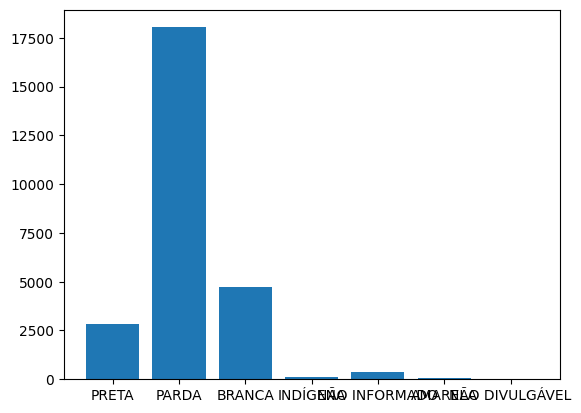

In [70]:

df_completo_2020[["CD_COR_RACA", "DS_COR_RACA"]].groupby(["DS_COR_RACA"]).count()

raca = df_completo_2020["DS_COR_RACA"].unique().tolist()
frequencia = df_completo_2020["DS_COR_RACA"].value_counts(sort=False).tolist()
plt.bar(raca,frequencia)
plt.show()



# Há correlação entre idade, gênero e custo da campanha?

In [71]:
df_completo_2016_2020[["NR_IDADE_DATA_POSSE", "CD_GENERO", "VR_DESPESA_MAX_CAMPANHA"]].corr(method='pearson')

,NR_IDADE_DATA_POSSE,CD_GENERO,VR_DESPESA_MAX_CAMPANHA
NR_IDADE_DATA_POSSE,1.000000,-0.101835,0.080565
CD_GENERO,-0.101835,1.000000,-0.032523
VR_DESPESA_MAX_CAMPANHA,0.080565,-0.032523,1.000000
